The data come from the Kaggle dataset Car Features and MSRP of Kaggle.   
It describes almost 12 000 car models sold in the USA between 1990 and 2018 with the market price (new or used) and some features.   
This study aims at performing some data manipulations and define a statistical model to predict the price of a car.   
Columnns:   

Make                :Car Make   
Model               :Car Model   
Year                :Car Year (Marketing)   
Engine Fuel Type    :Engine Fuel Type   
Engine HP           :Engine Horse Power (HP)   
Engine Cylinders    :Engine Cylinders   
Transmission Type   :Transmission Type   
Driven_Wheels       :Driven Wheels   
Number of Doors     :Number of Doors   
Market Category     :Market Category   
Vehicle Size        :Size of Vehicle   
Vehicle Style       :Type of Vehicle    
highway MPG         :Highway MPG    
city mpg            :City MPG (A measure of how far a car can travel if you put just one gallon of petrol or diesel in its tank.)   
Popularity          :Popularity (Twitter)   
MSRP                :Manufacturer Suggested Retail Price (a price recommended for the sale of an item in all retail outlets.)    

MSRP is the manufacturer's suggested retail price, a price recommended for the sale of an item in all retail outlets. A vendor can require retailers to sell its products at the MSRP and refuse to sell its products to a discounter if they price products below it.

This dataset consists of 16 Features where we have to predict our Price with the help of features. (Regression) We will observe, analyse, visualize the data. As well as we will perform all the regression algorithms and test with algorithm performs best among all.

In [295]:
import timeit
from sklearn import preprocessing
# Object manipulation
import statistics
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Plot
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sns

In [296]:
# Loading the data
df = pd.read_csv("C:/Users/eelif/Desktop/data.csv")
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [297]:
print("The dataframe contains",df.shape[0],"rows and",df.shape[1],"columns\n")
print("The labels are",[df.columns[i] for i in range(df.shape[1])], "\n")

df.info()

The dataframe contains 11914 rows and 16 columns

The labels are ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG', 'city mpg', 'Popularity', 'MSRP'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicl

In [298]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [299]:
df.drop(df[df['MSRP'] == 0].index,inplace=True)
# Dropping rows which have zero as a value for MSRP column as it is our dependent/target variable.

In [300]:
df.duplicated().sum()
#checking for any duplicates in the data

715

In [301]:
df.drop_duplicates(keep=False,inplace=True)
#removing the duplicates in the data

In [302]:
# checking null values
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3092
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

We observe, Market Category has the highest missing values followed by Engine HP and Enginer Cylinders.    
We see it is really not that useful for our model, especially when our data already consists of additional details like 'Model' , 'Vechicle Style' , 'Vechicle Size or Make'    
Anyone can guess which type of car it is from these features. We will drop the entire column 'Market Category'.     

In [303]:
df = df.drop('Market Category', axis = 1)
# dropping 'market category' column as MSRP is independent of it and hence not useful in predicting price of car. 

There are still other missing values: 'Engine Hp', 'Engine Cylinders', 'Number of Doors' and 'Engine Fuel Type'.

In [304]:
df['Engine HP'] = df['Engine HP'].fillna(0)
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(0)
# Replaced them with zero because electric vehicles don't have engine.
df['Number of Doors'] = df['Number of Doors'].fillna(df['Number of Doors'].mode()[0])
df['Engine Fuel Type'] = df['Engine Fuel Type'].fillna('regular unleaded')

In [305]:
df.isnull().sum() 
# No more missing values.

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [306]:
print(df['Make'].unique()) 
print()
print(df['Model'].unique())
print()
print(df['Engine Fuel Type'].unique()) 
print()
print(df['Transmission Type'].unique())
print()
print(df['Driven_Wheels'].unique())
print()
print(df['Vehicle Size'].unique())
print()
print(df['Vehicle Style'].unique())

['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']

['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglietti' '626' '62' '6

Machines understand numbers, not text. We need to convert each text category to numbers in order for the machine to process them using mathematical equations. For this reason we can use label encoding or one hot encoding.    
I'm going to use Label encoding for 'Make', 'Model' 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', and 'Vehicle Style' columns because there are many unique values and one-hot encoding can lead to high memory consumption; and One-Hot encoding for 'Vehicle Style'.    

In [307]:
# Label encoding
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()  
df['Make']= label_encoder.fit_transform(df['Make'])  
print(df['Make'].unique())
df['Model']= label_encoder.fit_transform(df['Model'])  
print(df['Model'].unique())
df['Engine Fuel Type']= label_encoder.fit_transform(df['Engine Fuel Type'])  
print(df['Engine Fuel Type'].unique())
df['Transmission Type']= label_encoder.fit_transform(df['Transmission Type'])  
print(df['Transmission Type'].unique())
df['Driven_Wheels']= label_encoder.fit_transform(df['Driven_Wheels'])  
print(df['Driven_Wheels'].unique())
df['Vehicle Style']= label_encoder.fit_transform(df['Vehicle Style'])  
print(df['Vehicle Style'].unique())

[ 4  3 12 31 10 33 47 29 32 13  1 45 30 28 36 37 39 15 19 35 18 34 43 14
  8 21  5  9 11 22 25 42 46 41  7  0 38 27 24  2 23 26 20 40 16 17 44  6]
[  1   0   2   3   4   6   7   8  10   9   5  13  12  15  16  14  17  18
  19  20  21  22  23  11  25  24  26  27  28  29  30  31  34  33  36  39
  35  37  38  40  41  43  44  42  45  32  48  47  49  50  51  53  52  54
  55  46  56  57  58  59  60  61  62  63  64  65  67  66  68  69  70  73
  72  71  74  75  76  77  78  79  80  81  83  82  84  85  86  87  95  94
  96  97  99 100 101  98 102 103 104 105 106 107 108 109 886 885  88  89
 110 112 111 113  90 114 115 116 117 119 118  92  93  91 120 121 123 122
 124 125 126 127 128 129 130 132 131 133 135 136 134 137 139 141 140 142
 143 144 145 146 147 148 149 150 151 152 153 154 138 155 156 159 160 161
 162 163 185 184 186 187 189 188 190 192 193 191 194 195 196 197 198 199
 200 201 202 204 203 164 205 206 207 208 209 210 211 212 213 215 216 214
 157 158 166 167 165 217 168 169 218 219 220 221 2

In [308]:
# One-hot encoding
cat_features = ["Vehicle Size"]
df = pd.get_dummies(df, columns = cat_features)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10582 entries, 0 to 11913
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  10582 non-null  int32  
 1   Model                 10582 non-null  int32  
 2   Year                  10582 non-null  int64  
 3   Engine Fuel Type      10582 non-null  int32  
 4   Engine HP             10582 non-null  float64
 5   Engine Cylinders      10582 non-null  float64
 6   Transmission Type     10582 non-null  int32  
 7   Driven_Wheels         10582 non-null  int32  
 8   Number of Doors       10582 non-null  float64
 9   Vehicle Style         10582 non-null  int32  
 10  highway MPG           10582 non-null  int64  
 11  city mpg              10582 non-null  int64  
 12  Popularity            10582 non-null  int64  
 13  MSRP                  10582 non-null  int64  
 14  Vehicle Size_Compact  10582 non-null  uint8  
 15  Vehicle Size_Large 

In [309]:
df.corrwith(df['MSRP'])

Make                   -0.107882
Model                  -0.026424
Year                    0.195554
Engine Fuel Type       -0.099380
Engine HP               0.644059
Engine Cylinders        0.537270
Transmission Type      -0.173479
Driven_Wheels          -0.026134
Number of Doors        -0.158659
Vehicle Style          -0.014202
highway MPG            -0.169020
city mpg               -0.164099
Popularity             -0.049125
MSRP                    1.000000
Vehicle Size_Compact   -0.080227
Vehicle Size_Large      0.119835
Vehicle Size_Midsize   -0.026367
dtype: float64

In [310]:
df.corr()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Vehicle Size_Compact,Vehicle Size_Large,Vehicle Size_Midsize
Make,1.000000,0.078967,-0.064870,0.141862,-0.226584,-0.237694,0.062305,-0.042757,0.081181,-0.055476,0.105639,0.140314,-0.277191,-0.107882,0.168371,-0.180121,-0.008551
Model,0.078967,1.000000,0.065684,-0.025978,0.000187,0.047682,-0.101986,-0.084969,0.151256,-0.106887,-0.091319,-0.022911,-0.091708,-0.026424,-0.074036,0.104897,-0.019238
Year,-0.064870,0.065684,1.000000,-0.232811,0.309808,-0.030632,-0.316670,-0.173242,0.240253,-0.081890,0.239738,0.184186,0.093922,0.195554,-0.117239,0.060928,0.063680
Engine Fuel Type,0.141862,-0.025978,-0.232811,1.000000,-0.141747,-0.069913,0.111905,0.008237,0.014693,-0.047582,-0.173529,-0.188097,-0.066343,-0.099380,0.129125,-0.203953,0.052353
Engine HP,-0.226584,0.000187,0.309808,-0.141747,1.000000,0.787170,-0.225466,-0.013949,-0.156696,0.004179,-0.427627,-0.435556,0.039223,0.644059,-0.326959,0.331402,0.033051
Engine Cylinders,-0.237694,0.047682,-0.030632,-0.069913,0.787170,1.000000,-0.184590,0.088335,-0.163745,0.036504,-0.605814,-0.583740,0.042746,0.537270,-0.373728,0.433606,-0.011270
Transmission Type,0.062305,-0.101986,-0.316670,0.111905,-0.225466,-0.184590,1.000000,0.178805,-0.329184,-0.029385,0.068690,0.070665,0.014754,-0.173479,0.361534,-0.179030,-0.204297
Driven_Wheels,-0.042757,-0.084969,-0.173242,0.008237,-0.013949,0.088335,0.178805,1.000000,-0.257822,0.100816,-0.003536,-0.010187,0.021392,-0.026134,0.097896,0.042840,-0.137055
Number of Doors,0.081181,0.151256,0.240253,0.014693,-0.156696,-0.163745,-0.329184,-0.257822,1.000000,0.156235,0.117632,0.124868,-0.066855,-0.158659,-0.261521,0.126500,0.150470
Vehicle Style,-0.055476,-0.106887,-0.081890,-0.047582,0.004179,0.036504,-0.029385,0.100816,0.156235,1.000000,0.028201,-0.041216,0.042470,-0.014202,-0.192523,0.190420,0.023686


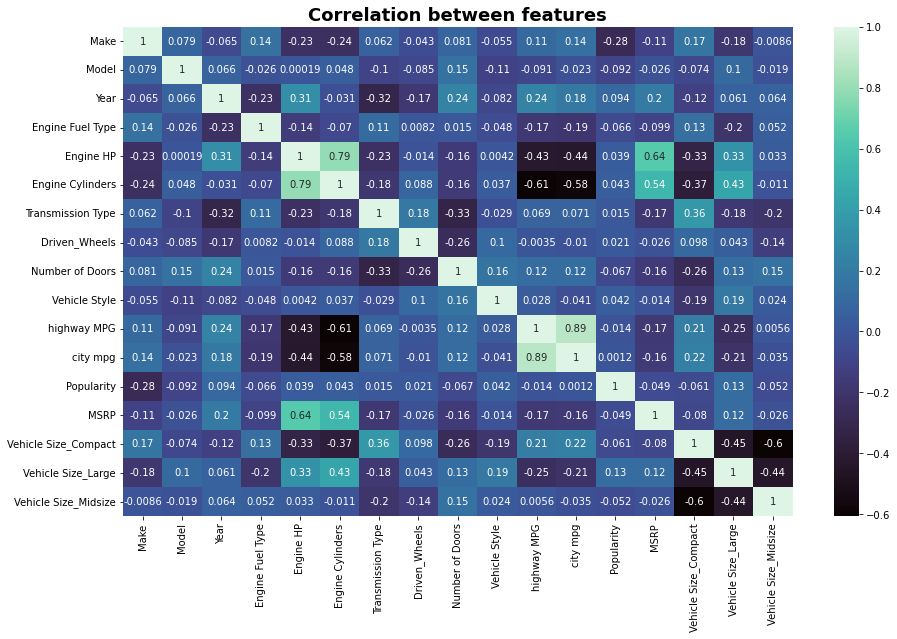

In [311]:
df_corr=df.corr()
f,ax=plt.subplots(figsize=(15,9))
sns.heatmap(df_corr,cmap='mako',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

In [312]:
# Splitting the Dataset
xdf = df.drop(["MSRP"], axis = 1)
X = xdf.values
y = df["MSRP"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [313]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8465, 16)
(8465,)
(2117, 16)
(2117,)


In [314]:
X

array([[4.000e+00, 1.000e+00, 2.011e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [4.000e+00, 0.000e+00, 2.011e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [4.000e+00, 0.000e+00, 2.011e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 8.830e+02, 2.012e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 8.830e+02, 2.013e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.500e+01, 8.840e+02, 2.006e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [315]:
# normalizing the data
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()

X=sc_x.fit_transform(X)

In [316]:
X

array([[-1.29974219, -1.69922939,  0.00824523, ...,  1.26668048,
        -0.57393117, -0.76350959],
       [-1.29974219, -1.70300752,  0.00824523, ...,  1.26668048,
        -0.57393117, -0.76350959],
       [-1.29974219, -1.70300752,  0.00824523, ...,  1.26668048,
        -0.57393117, -0.76350959],
       ...,
       [-1.58246154,  1.63308386,  0.1517502 , ..., -0.78946507,
        -0.57393117,  1.30974124],
       [-1.58246154,  1.63308386,  0.29525517, ..., -0.78946507,
        -0.57393117,  1.30974124],
       [ 0.18453435,  1.63686199, -0.70927961, ..., -0.78946507,
        -0.57393117,  1.30974124]])

Modeling and Testing

In [317]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
import math
import numpy as np

Support Vector Machine

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.   
The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.   
SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

In [318]:
start = timeit.default_timer()
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr_model = make_pipeline(svr)
svr_model.fit(X_train,y_train)
print(svr_model)
# calculating the accuracies
print("Training Accuracy :",svr_model.score(X_train,y_train))
print("Testing Accuracy :",svr_model.score(X_test,y_test))

Pipeline(steps=[('svr', SVR())])
Training Accuracy : -0.03343647679638839
Testing Accuracy : -0.04914574580006548


In [319]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(svr_model, X, y, cv=cv, n_jobs=-1)
# report performance
print('score: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

score: -0.035 (0.006)


In [320]:
svr_yp = svr_model.predict(X_test)
print("R2 Score:",mean_squared_error(y_test, svr_yp))
print("Mean Squarred Error:", mean_squared_error(y_test, svr_yp))
print("Root Mean Squarred Error:", math.sqrt(mean_squared_error(y_test, svr_yp)))
print("MAPE:",mean_absolute_percentage_error(y_test, svr_yp))

R2 Score: 2608925986.798368
Mean Squarred Error: 2608925986.798368
Root Mean Squarred Error: 51077.64664506743
MAPE: 1.635443066044965


Time:  22.8630634000001


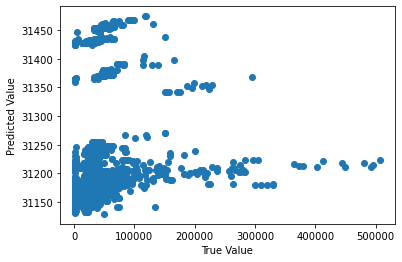

In [321]:
plt.scatter(y_test, svr_yp)
plt.xlabel('True Value')
plt.ylabel("Predicted Value")
stop = timeit.default_timer()
svr_time = stop - start
print('Time: ', svr_time)

Linear Regression

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.

In [322]:
start = timeit.default_timer()
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_model = make_pipeline(lr)
lr_model.fit(X_train,y_train)

# calculating the accuracies
print("Training Accuracy :",lr_model.score(X_train,y_train))
print("Testing Accuracy :",lr_model.score(X_test,y_test))

Training Accuracy : 0.4816464010542366
Testing Accuracy : 0.5425761928514978


In [323]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(lr_model, X, y, cv=cv, n_jobs=-1)
# report performance
print('score: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

score: 0.512 (0.080)


In [324]:
lr_yp = lr_model.predict(X_test)
print("R2 Score:",mean_squared_error(y_test, lr_yp))
print("Mean Squarred Error:", mean_squared_error(y_test, lr_yp))
print("Root Mean Squarred Error:", math.sqrt(mean_squared_error(y_test, lr_yp)))
print("MAPE:",mean_absolute_percentage_error(y_test, lr_yp))

R2 Score: 1137482434.8545704
Mean Squarred Error: 1137482434.8545704
Root Mean Squarred Error: 33726.58350403388
MAPE: 1.298923307454136


Time:  1.5812660999999935


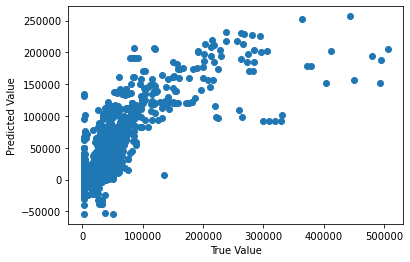

In [325]:
plt.scatter(y_test, lr_yp)
plt.xlabel('True Value')
plt.ylabel("Predicted Value")
stop = timeit.default_timer()
lr_time = stop - start
print('Time: ', lr_time)

LGBM Regressor

A Gradient Boosting Decision tree or a GBDT is a very popular machine learning algorithm that has effective implementations.    
The efficiency and scalability of the model are not quite up to the mark when there are more features in the data. For this specific behavior, the major reason is that each feature should scan all the various data instances to make an estimate of all the possible split points which is very time-consuming and tedious.    
To solve this problem, The LGBM or Light Gradient Boosting Model is used.

In [326]:
start = timeit.default_timer()
lgm = LGBMRegressor(n_estimators = 200)
model = make_pipeline(lgm)
model.fit(X_train, y_train)
print(model)
print("Training Accuracy :",lgm.score(X_train,y_train))
print("Testing Accuracy :",lgm.score(X_test,y_test))

Pipeline(steps=[('lgbmregressor', LGBMRegressor(n_estimators=200))])
Training Accuracy : 0.9417074955054746
Testing Accuracy : 0.9453866858564184


In [327]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
# report performance
print('score: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

score: 0.905 (0.084)


In [328]:
yp = lgm.predict(X_test)
print("R2 Score:", r2_score(y_test, yp))
print("Mean Squared Error:",mean_squared_error(y_test, yp))
print("RSME:", math.sqrt(mean_squared_error(y_test, yp)))
print("MAPE:",mean_absolute_percentage_error(y_test, yp))

R2 Score: 0.9453866858564184
Mean Squared Error: 135807722.67795634
RSME: 11653.65705167079
MAPE: 0.13383983042301226


Time:  3.1683720000000903


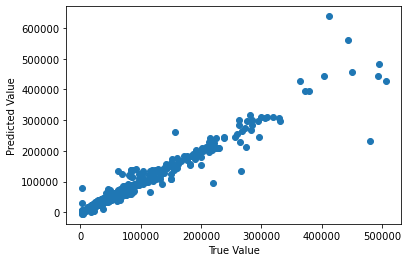

In [329]:
plt.scatter(y_test, yp)
plt.xlabel('True Value')
plt.ylabel("Predicted Value")
stop = timeit.default_timer()
lgm_time = stop - start
print('Time: ', lgm_time)

XGB Regressor

XGBoost is an efficient implementation of gradient boosting that can be used for regression predictive modeling.   
Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems. Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.   
Extreme Gradient Boosting, or XGBoost for short, is an efficient open-source implementation of the gradient boosting algorithm. As such, XGBoost is an algorithm, an open-source project, and a Python library.

In [330]:
start = timeit.default_timer()
xgb = XGBRegressor()
parameters = {'n_estimators': [500]}
xgb_grid = GridSearchCV(xgb, parameters, cv = 2 )
xgb_grid.fit(X_train, y_train)
print("Training Accuracy :",xgb_grid.score(X_train,y_train))
print("Testing Accuracy :",xgb_grid.score(X_test,y_test))

Training Accuracy : 0.9937978820180313
Testing Accuracy : 0.9721870241027762


In [331]:
print(xgb_grid.best_score_)

0.797675367837722


In [332]:
xgb_grid.best_params_

{'n_estimators': 500}

In [333]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(xgb_grid, X, y, cv=cv, n_jobs=-1)
# report performance
print('score: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

score: 0.933 (0.079)


In [334]:
print("The dataframe contains",df.shape[0],"rows and",df.shape[1],"columns\n")
print("The labels are",[df.columns[i] for i in range(df.shape[1])], "\n")

df.info()

The dataframe contains 10582 rows and 17 columns

The labels are ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Vehicle Style', 'highway MPG', 'city mpg', 'Popularity', 'MSRP', 'Vehicle Size_Compact', 'Vehicle Size_Large', 'Vehicle Size_Midsize'] 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10582 entries, 0 to 11913
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  10582 non-null  int32  
 1   Model                 10582 non-null  int32  
 2   Year                  10582 non-null  int64  
 3   Engine Fuel Type      10582 non-null  int32  
 4   Engine HP             10582 non-null  float64
 5   Engine Cylinders      10582 non-null  float64
 6   Transmission Type     10582 non-null  int32  
 7   Driven_Wheels         10582 non-null  int32  
 8   Number of Doors       10582 non-null 

In [335]:
xgb_predict = xgb_grid.predict(X_test)
print("R2 score",r2_score(y_test, xgb_predict))
print("Mean Squarred Error:",mean_squared_error(y_test, xgb_predict))
print("Root Mean Squarred Error:", math.sqrt(mean_squared_error(y_test, xgb_predict)))
print("MAPE:",mean_absolute_percentage_error(y_test, xgb_predict))

R2 score 0.9721870241027762
Mean Squarred Error: 69162931.72702026
Root Mean Squarred Error: 8316.425417631079
MAPE: 0.09879991439890928


Time:  12.218570099999852


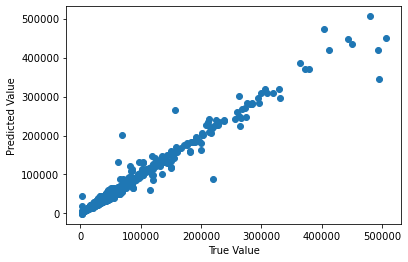

In [336]:
plt.scatter(y_test, xgb_predict)
plt.xlabel('True Value')
plt.ylabel("Predicted Value")
stop = timeit.default_timer()
xgb_time = stop - start
print('Time: ', xgb_time)

Random Forest Regressor

Every decision tree has high variance, but when we combine all of them together in parallel then the resultant variance is low as each decision tree gets perfectly trained on that particular sample data, and hence the output doesn’t depend on one decision tree but on multiple decision trees.   
Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.

In [337]:
start = timeit.default_timer()
rfr = RandomForestRegressor(n_estimators = 100)
rfr_model = make_pipeline(rfr)
rfr_model.fit(X_train, y_train)
print(rfr_model)
print("Training Accuracy :",rfr_model.score(X_train,y_train))
print("Testing Accuracy :",rfr_model.score(X_test,y_test))

Pipeline(steps=[('randomforestregressor', RandomForestRegressor())])
Training Accuracy : 0.9860581511326963
Testing Accuracy : 0.9751756180436367


In [338]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(rfr_model, X, y, cv=cv, n_jobs=-1)
# report performance
print('score: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

score: 0.935 (0.083)


In [339]:
rfr_yp = rfr.predict(X_test)
print("R2 Score:",mean_squared_error(y_test, rfr_yp))
print("Mean Squarred Error:", mean_squared_error(y_test, rfr_yp))
print("Root Mean Squarred Error:", math.sqrt(mean_squared_error(y_test, rfr_yp)))
print("MAPE:",mean_absolute_percentage_error(y_test, rfr_yp))

R2 Score: 61731151.702641465
Mean Squarred Error: 61731151.702641465
Root Mean Squarred Error: 7856.917442778781
MAPE: 0.09630418109960538


Time:  6.179033399999753


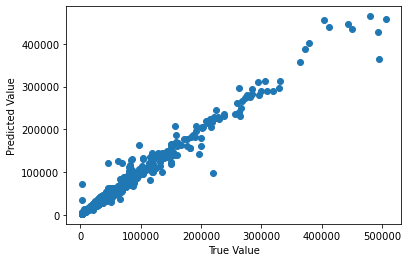

In [340]:
plt.scatter(y_test, rfr_yp)
plt.xlabel('True Value')
plt.ylabel("Predicted Value")
stop = timeit.default_timer()
rfr_time = stop - start
print('Time: ', rfr_time)

In [341]:
print(df['MSRP'].min())
print(df['MSRP'].max())
print(df['MSRP'].mean())

2000
2065902
43096.336609336606


In [342]:
results_df = pd.DataFrame(data=[["Support Vector Machine", svr_model.score(X_train,y_train),svr_model.score(X_test,y_test),mean_absolute_percentage_error(y_test, svr_yp),r2_score(y_test,svr_yp),mean_squared_error(y_test,svr_yp),math.sqrt(mean_squared_error(y_test,svr_yp)),svr_time]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','MAPE','r2 score','MSE','RSME','Time'])

results_df_2 = pd.DataFrame(data=[["Linear Regression", lr_model.score(X_train,y_train),lr_model.score(X_test,y_test),mean_absolute_percentage_error(y_test, lr_yp),r2_score(y_test,lr_yp),mean_squared_error(y_test,lr_yp),math.sqrt(mean_squared_error(y_test,lr_yp)),lr_time]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','MAPE','r2 score','MSE','RSME','Time'])
results_df = results_df.append(results_df_2, ignore_index=True)

results_df_2 = pd.DataFrame(data=[["LGBM Regressor", model.score(X_train,y_train),model.score(X_test,y_test),mean_absolute_percentage_error(y_test, yp),r2_score(y_test,yp),mean_squared_error(y_test,yp),math.sqrt(mean_squared_error(y_test,yp)),lgm_time]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','MAPE','r2 score','MSE','RSME','Time'])
results_df = results_df.append(results_df_2, ignore_index=True)

results_df_2 = pd.DataFrame(data=[["XGB Regressor", xgb_grid.score(X_train,y_train),xgb_grid.score(X_test,y_test),mean_absolute_percentage_error(y_test, xgb_predict),r2_score(y_test,xgb_predict),mean_squared_error(y_test,xgb_predict),math.sqrt(mean_squared_error(y_test,xgb_predict)),xgb_time]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','MAPE','r2 score','MSE','RSME','Time'])
results_df = results_df.append(results_df_2, ignore_index=True)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", rfr_model.score(X_train,y_train),rfr_model.score(X_test,y_test),mean_absolute_percentage_error(y_test, rfr_yp),r2_score(y_test,rfr_yp),mean_squared_error(y_test,rfr_yp),math.sqrt(mean_squared_error(y_test,rfr_yp)),rfr_time]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','MAPE','r2 score','MSE','RSME','Time'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %,MAPE,r2 score,MSE,RSME,Time
0,Support Vector Machine,-0.033436,-0.049146,1.635443,-0.049146,2.608926e+09,51077.646645,22.863063
1,Linear Regression,0.481646,0.542576,1.298923,0.542576,1.137482e+09,33726.583504,1.581266
2,LGBM Regressor,0.941707,0.945387,0.133840,0.945387,1.358077e+08,11653.657052,3.168372
3,XGB Regressor,0.993798,0.972187,0.098800,0.972187,6.916293e+07,8316.425418,12.218570
4,Random Forest Regressor,0.986058,0.975176,0.096304,0.975176,6.173115e+07,7856.917443,6.179033


So, from the above table, the best suitable algorithm for the given dataset is "Random Forest" with an accuracy of "97%" and the lowest RSME.